In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
weather = pd.read_csv("weatherHistory.csv", sep=',')

In [ ]:
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
weather.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [ ]:
weather = weather.drop('Loud Cover', axis = 1)

In [ ]:
weather = weather.drop('Daily Summary', axis = 1)

In [ ]:
weather = weather.drop('Apparent Temperature (C)', axis = 1)

In [ ]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [ ]:
tmp = np.array(map(lambda x: int(x.split('-')[1]), weather['Formatted Date']))
weather['Formatted Date Month'] = tmp 
hour = np.array(map(lambda x: int(x.split(' ')[1][:2]), weather['Formatted Date']))
weather['Hour'] = hour
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Formatted Date Month,Hour
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,4,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,4,1
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,2
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,3
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,19
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,20
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,21
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,22


In [ ]:
weather.isna().sum()

Formatted Date              0
Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Formatted Date Month        0
Hour                        0
dtype: int64

In [ ]:
w = weather.drop('Formatted Date', axis = 1)
w = pd.get_dummies(w, columns = ['Summary'])
w = w.dropna(axis= 0, how='any')
w

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Formatted Date Month,Hour,Summary_Breezy,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,4,0,0,...,0,0,1,0,0,0,0,0,0,0
1,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,4,1,0,...,0,0,1,0,0,0,0,0,0,0
2,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,2,0,...,1,0,0,0,0,0,0,0,0,0
3,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,3,0,...,0,0,1,0,0,0,0,0,0,0
4,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,19,0,...,0,0,1,0,0,0,0,0,0,0
96449,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,20,0,...,0,0,1,0,0,0,0,0,0,0
96450,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,21,0,...,0,0,1,0,0,0,0,0,0,0
96451,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,22,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
weather['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
y = w['Temperature (C)']
x = w.drop(columns = 'Temperature (C)')
lb = LabelEncoder()
lb.fit(x['Precip Type'])
x['Precip Type'] = lb.transform(x['Precip Type'])
x

,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Formatted Date Month,Hour,Summary_Breezy,Summary_Breezy and Dry,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,0,0.89,14.1197,251.0,15.8263,1015.13,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.86,14.2646,259.0,15.8263,1015.63,4,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.89,3.9284,204.0,14.9569,1015.94,4,2,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0.83,14.1036,269.0,15.8263,1016.41,4,3,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.83,11.0446,259.0,15.8263,1016.51,4,4,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0,0.43,10.9963,31.0,16.1000,1014.36,9,19,0,0,...,0,0,1,0,0,0,0,0,0,0
96449,0,0.48,10.0947,20.0,15.5526,1015.16,9,20,0,0,...,0,0,1,0,0,0,0,0,0,0
96450,0,0.56,8.9838,30.0,16.1000,1015.66,9,21,0,0,...,0,0,1,0,0,0,0,0,0,0
96451,0,0.60,10.5294,20.0,16.1000,1015.95,9,22,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
Shindzi = LinearRegression()
Shindzi.fit(x_train, y_train)
y_pred = Shindzi.predict(x_test)

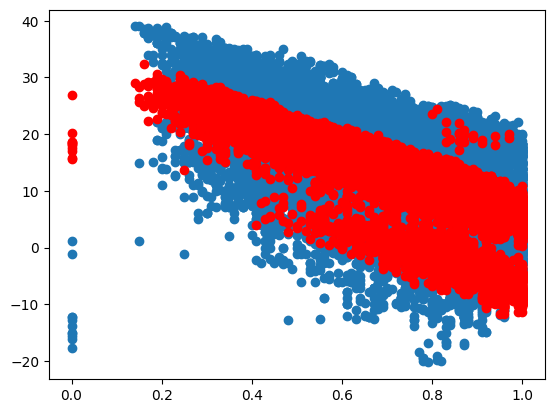

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x_test['Humidity'], y_test)
ax.scatter(x_test['Humidity'], y_pred, color = 'red')

In [ ]:
print('y =', Shindzi.intercept_, end = ' ')
for i in range(len(Shindzi.coef_)):
  print('+', Shindzi.coef_[i], '*', x_train.columns.values[i],  end = ' ')

y = 33.39837626368384 + -12.102914193888193 * Precip Type + -25.86346797454982 * Humidity + -0.18959143611862253 * Wind Speed (km/h) + 0.002253660789900651 * Wind Bearing (degrees) + 0.17728571441337138 * Visibility (km) + -0.001104778845045008 * Pressure (millibars) + 0.316083055041282 * Formatted Date Month + -0.008000272397607467 * Hour + -3.4972837068693217 * Summary_Breezy + -1.1948257156028201 * Summary_Breezy and Dry + 4.682024716894903 * Summary_Breezy and Foggy + -2.014083215547536 * Summary_Breezy and Mostly Cloudy + -1.7816075707378238 * Summary_Breezy and Overcast + -3.9420554001236217 * Summary_Breezy and Partly Cloudy + -2.907218514477886 * Summary_Clear + -1.49350996213078 * Summary_Dangerously Windy and Partly Cloudy + -1.7202477342556948 * Summary_Drizzle + 1.7930664557225129 * Summary_Dry + -1.5030629515684526 * Summary_Dry and Mostly Cloudy + -2.115275932732889 * Summary_Dry and Partly Cloudy + -2.520204562640755 * Summary_Foggy + 8.575580361791305 * Summary_Humid an

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 4.781546967690093
Mean Squared Error: 34.21121817988938
R2 score: 0.6278497247298047


Метрики плохие, так как в данных нет линейной зависимости